# 日期和时间
- Python 金融大数据分析 附录C
- 目录：
  > - python
  > > http://www.cnblogs.com/fclbky/articles/4098204.html
  > - numpy
  > - pandas

In [53]:
from datetime import datetime
from datetime import timedelta

from dateutil.parser import parse
from IPython.display import Image

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## 1 python

### 1.1 datetime 模块
- 基本的日期和时间类型
- datetime 模块提供了各种类用于操作日期和时间，该模块侧重于高效率的格式化输出
- 在 Python 中，与时间处理有关的模块包括：time，datetime 以及 calendar

#### 1.1.1 常量
- datetime.MINYEAR 
  > date 和 datetime 对象所能支持的最小年份，object.MINYEAR 的值为 1
- datetime.MAXYEAR 
  > date 和 datetime 对象所能支持的最大年份，object.MAXYEAR 的值为 9999

#### 1.1.2 datetime 模块中定义的类（前四个下方有详解）：
- datetime.date 
  > 表示日期的类，常用属性：year, month, day
- datetime.time 
  > 表示时间的类，常用属性：hour, minute, second, microsecond, tzinfo
- datetime.datetime 
  > 表示日期和时间的类，常用属性： year, month, day, hour, minute, second, microsecond, tzinfo
- datetime.timedelta 
  > 表示时间间隔，即两个时间点（date，time，datetime）之间的长度
- datetime.tzinfo 
  > 表示时区的基类，为上方的 time 和 datetime 类提供调整的基准
- datetime.timezone
  > 表示 UTC 时区的固定偏移，是 tzinfo 基类的实现

- 注：上边这些类的对象是不可变的

- 上边这些类的从属关系：
- object
  > - timedelta
  > - tzinfo
  > > - timezone
  > - time
  > - date
  > > - datetime

#### 1.1.3 datetime 对象
- 是 date 对象和 time 对象的结合体，并且包含他们的所有信息
- 语法：
  > - datetime.datetime(year, month, day, hour=0, minute=0, second=0, microsecond=0, tzinfo=None)
  > - 必须的参数是 year（年）、month（月）、day（日）；tzinfo 可以是 None 或者 tzinfo 子类的实例对象；其余的参数可以是整数，并且在以下范围内：
  > > - MINYEAR <= year <= MAXYEAR（也就是 1 ~ 9999）
  > > - 1 <= month <= 12
  > > - 1 <= day <= 根据 year 和 month 来决定（例如 2015年2月 只有 28 天）
  > > - 0 <= hour < 24
  > > - 0 <= minute < 60
  > > - 0 <= second < 60
  > > - 0 <= microsecond < 1000000
  > - 注：如果参数超出范围，将引发 ValueError 异常

#### 1.1.3.1 datetime 类方法（classmethod）：
- datetime.today()
  > 返回一个表示当前本地时间的 datetime 对象，等同于 datetime.fromtimestamp(time.time())
- datetime.now(tz=None)
  > 返回一个表示当前本地时间的 datetime 对象；如果提供了参数 tz，则获取 tz 参数所指时区的本地时间
- datetime.utcnow()
  > 返回一个当前 UTC 时间的 datetime 对象
- datetime.fromtimestamp(timestamp, tz=None)
  > 根据时间戮创建一个 datetime 对象，参数 tz 指定时区信息
- datetime.utcfromtimestamp(timestamp)
  > 根据时间戮创建一个 UTC 时间的 datetime 对象
- datetime.fromordinal(ordinal)
  > 返回对应 Gregorian 日历时间对应的 datetime 对象
- datetime.combine(date, time)
  > 根据参数 date 和 time，创建一个 datetime 对象
- datetime.strptime(date_string, format)
  > 将格式化字符串转换为 datetime 对象

#### 1.1.3.2 datetime 实例方法：
- datetime.date()
  > 返回一个 date 对象datetime.time() - 返回一个 time 对象（tzinfo 属性为 None）
- datetime.timetz()
  > 返回一个 time() 对象（带有 tzinfo 属性）
- datetime.replace([year[, month[, day[, hour[, minute[, second[, microsecond[, tzinfo]]]]]]]])
  > 生成一个新的日期对象，用参数指定日期和时间代替原有对象中的属性
- datetime.astimezone(tz=None)
  > 传入一个新的 tzinfo 属性，返回根据新时区调整好的 datetime 对象
- datetime.utcoffset()
  > 如果 tzinfo 属性是 None，则返回 None；否则返回 self.tzinfo.utcoffset(self)
- datetime.dst()
  > 如果 tzinfo 属性是 None，则返回 None；否则返回 self.tzinfo.dst(self)
- datetime.tzname()
  > 如果 tzinfo 属性是 None，则返回 None；否则返回 self.tzinfo.tzname(self)
- datetime.timetuple()
  > 返回日期对应的 time.struct_time 对象（类似于 time 模块的 time.localtime()）
- datetime.utctimetuple()
  > 返回 UTC 日期对应的 time.struct_time 对象
- datetime.toordinal()
  > 返回日期对应的 Gregorian Calendar 日期（类似于 self.date().toordinal()）
- datetime.timestamp()
  > 返回当前时间的时间戳（类似于 time 模块的 time.time()）
- datetime.weekday()
  > 返回 0 ~ 6 表示星期几（星期一是 0，依此类推）
- datetime.isoweekday() 
  > 返回 1 ~ 7 表示星期几（星期一是1， 依此类推）
- datetime.isocalendar() 
  > 返回一个三元组格式 (year, month, day)
- datetime.isoformat(sep='T')
  > 返回一个 ISO 8601 格式的日期字符串，如 "YYYY-MM-DD" 的字符串
- datetime.\__str\__()
  > 对于 date 对象 d 来说，str(d) 相当于 d.isoformat()
- datetime.ctime()
  > 返回一个表示日期的字符串，相当于 time 模块的 time.ctime(time.mktime(d.timetuple()))
- datetime.strftime(format)
  > 返回自定义格式化字符串表示日期，下面有详解
- datetime.\__format\__(format)
  > 跟 datetime.strftime(format) 一样，这使得调用 str.format() 时可以指定 data 对象的字符串

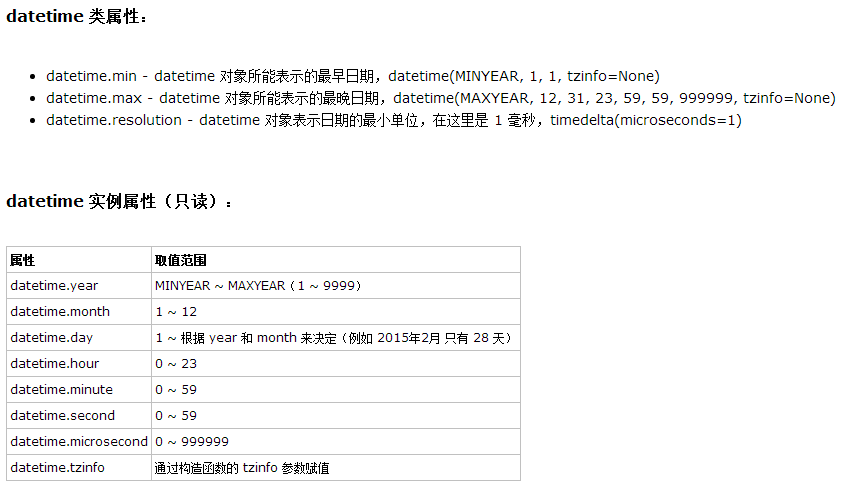

In [85]:
Image(filename="py35_picture\chap-111-7.png")

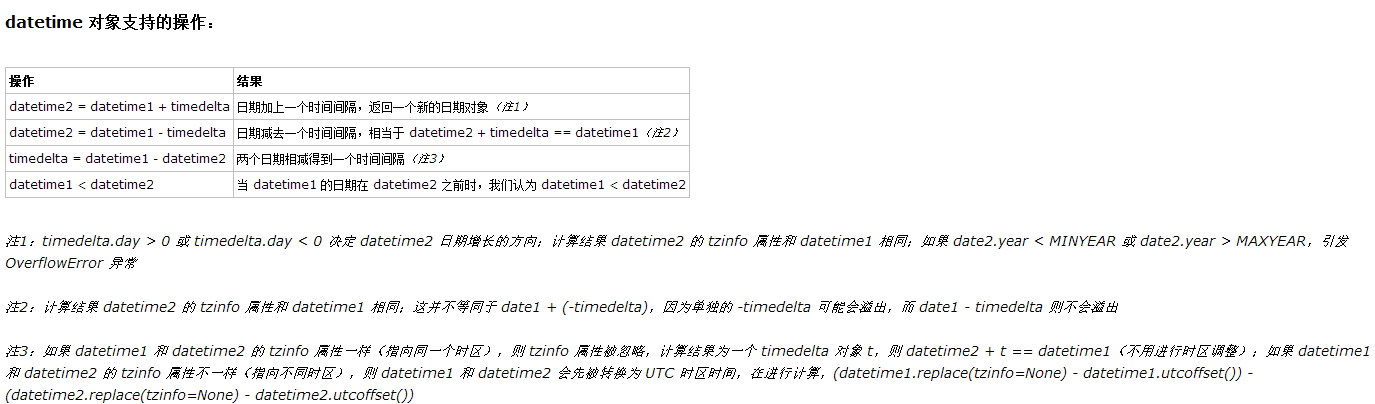

In [86]:
Image(filename="py35_picture\chap-111-8.png")

In [114]:
import datetime as dt
dt.datetime.now()

datetime.datetime(2017, 1, 10, 14, 46, 28, 623660)

In [14]:
print('now is %s' %dt.datetime.now())

to = dt.datetime.today()
print('today is %s' %to)
print()
print(type(to)) # datetime 对象

print('weekend is %s' %dt.datetime.today().weekday()) # 0 = monday; zero-based numbering

now is 2017-01-10 11:10:24.924673
today is 2017-01-10 11:10:24.924674
<class 'datetime.datetime'>
weekend is 1


In [40]:
d = dt.datetime(2017,1,10,11,12,25,50000) # 构造 datetime 对象
print(d)
print(str(d))
print()

print(d.year) # 提取成分
print(d.month) 
print(d.day) 
print(d.hour) 

2017-01-10 11:12:25.050000
2017-01-10 11:12:25.050000

2017
1
10
11


In [38]:
o = d.toordinal() # 将日期信息转换为序数
print(o)
print(type(o))

dt.datetime.fromordinal(o) # 丢失了时间信息

736339
<class 'int'>


datetime.datetime(2017, 1, 10, 0, 0)

In [41]:
t = dt.datetime.time(d)  # 提取时间信息，得到time对象
print(t)
print(type(t))

dd = dt.datetime.date(d)  # 提取日期信息，得到date对象
print(dd)
print(type(dd))

d.replace(second = 0, microsecond = 0)

11:12:25.050000
<class 'datetime.time'>
2017-01-10
<class 'datetime.date'>


datetime.datetime(2017, 1, 10, 11, 12)

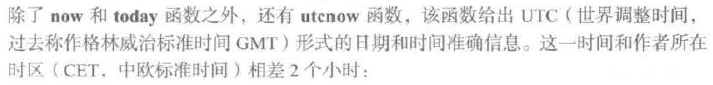

In [112]:
Image(filename="py35_picture\chap-UTC.png")

In [117]:
print(dt.datetime.utcnow()) # Coordinated Universal Time

dt.datetime.now() - dt.datetime.utcnow()  # UTC + 2h = CET(summer)

2017-01-10 06:48:11.090615


datetime.timedelta(0, 28800)

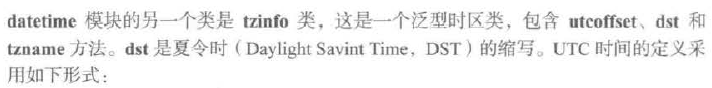

In [118]:
Image(filename="py35_picture\chap-DST.png")

In [121]:
class UTC(dt.tzinfo):
    def utcoffset(self,d):
        return dt.timedelta(hours = 0)
    def dst(self,d):
        return dt.timedelta(hours = 0)
    def tzname(self,d):
        return 'UTC'

In [122]:
u = dt.datetime.utcnow()  # replace 方法定义UTC
u = u.replace(tzinfo = UTC()) # attach time zone infromation
u

datetime.datetime(2017, 1, 10, 6, 53, 39, 931138, tzinfo=<__main__.UTC object at 0x000001C06CC576D8>)

In [123]:
class CET(dt.tzinfo):
    def utcoffset(self,d):
        return dt.timedelta(hours = 2)
    def dst(self,d):
        return dt.timedelta(hours = 1)
    def tzname(self,d):
        return 'CET + 1'

In [124]:
u.astimezone(CET()) # 使用astimezone方法，将基于UTC的对象转换为基于CET的对象

datetime.datetime(2017, 1, 10, 8, 53, 39, 931138, tzinfo=<__main__.CET object at 0x000001C06CC57BA8>)

In [89]:
from datetime import datetime, date, time

# 使用 datetime.combine()
d = date(2015, 8, 1)
t = time(12, 30)
print(d)
print(t)

print(datetime.combine(d, t))

2015-08-01
12:30:00
2015-08-01 12:30:00


In [91]:
# 使用 datetime.now() 或 datetime.utcnow()
print(datetime.now())
print(datetime.utcnow())

datetime(2014, 8, 31, 10, 13, 49, 347984)

2017-01-10 13:39:34.672547
2017-01-10 05:39:34.672547


datetime.datetime(2014, 8, 31, 10, 13, 49, 347984)

In [92]:
# 使用 datetime.srptime()
dt = datetime.strptime("21/11/14 16:30", "%d/%m/%y %H:%M")
dt

datetime.datetime(2014, 11, 21, 16, 30)

In [93]:
# 使用 datetime.timetuple()
tt = dt.timetuple()
print(tt);print()
for it in tt:
    print(it)

time.struct_time(tm_year=2014, tm_mon=11, tm_mday=21, tm_hour=16, tm_min=30, tm_sec=0, tm_wday=4, tm_yday=325, tm_isdst=-1)

2014
11
21
16
30
0
4
325
-1


In [94]:
# ISO 格式的日期
ic = dt.isocalendar()
print(ic);print()
for it in ic:
     print(it)

(2014, 47, 5)

2014
47
5


In [96]:
# 格式化 datetime 对象
print(dt.strftime("%A, %d. %B %Y %I:%M%p"))
print('The {1} is {0:%d}, the {2} is {0:%B}, the {3} is {0:%I:%M%p}.'.format(dt, "day", "month", "time"))

Friday, 21. November 2014 04:30PM
The day is 21, the month is November, the time is 04:30PM.


- 带有 tzinfo 的 datetime 综合演示

In [98]:
from datetime import timedelta, datetime, tzinfo

class GMT1(tzinfo):
        def utcoffset(self, dt):
                return timedelta(hours=1) + self.dst(dt)
        def dst(self, dt):
                # DST 开始于三月最后一个星期天
                # 结束于十月最后一个星期天
                d = datetime(dt.year, 4, 1)
                self.dston = d - timedelta(days=d.weekday() + 1)
                d = datetime(dt.year, 11, 1)
                self.dstoff = d - timedelta(days=d.weekday() + 1)
                if self.dston <= dt.replace(tzinfo=None) < self.dstoff:
                        return timedelta(hours=1)
                else:
                        return timedelta(0)
        def tzname(self, dt):
                return "GMT +1"
        
class GMT2(tzinfo):
        def utcoffset(self, dt):
                return timedelta(hours=2) + self.dst(dt)
        def dst(self, dt):
                d = datetime(dt.year, 4, 1)
                self.dston = d - timedelta(days=d.weekday() + 1)
                d = datetime(dt.year, 11, 1)
                self.dstoff = d - timedelta(days=d.weekday() + 1)
                if self.dston <=  dt.replace(tzinfo=None) < self.dstoff:
                        return timedelta(hours=1)
                else:
                        return timedelta(0)
        def tzname(self, dt):
                return "GMT +2"
        
gmt1 = GMT1()

In [102]:
# 夏令时
dt1 = datetime(2014, 11, 21, 16, 30, tzinfo=gmt1)
print(dt1.dst())
print(dt1.utcoffset())

0:00:00
1:00:00


In [103]:
dt2 = datetime(2014, 6, 14, 13, 0, tzinfo=gmt1)
print(dt2.dst())
print(dt2.utcoffset())

1:00:00
2:00:00


In [104]:
# 将 datetime 转换到另一个时区
dt3 = dt2.astimezone(GMT2())
print(dt3)
print(dt2)
print(dt2.utctimetuple() == dt3.utctimetuple())

2014-06-14 14:00:00+03:00
2014-06-14 13:00:00+02:00
True


#### 1.1.4 timedelta 对象
- 表示两个日期或时间之间的间隔
- 语法：
  > - datetime.timedelta(days=0, seconds=0, microseconds=0, milliseconds=0, minutes=0, hours=0, weeks=0) 
  > - 以上所有的参数都是可选的（默认为 0），参数的可以是整数或浮点数，正数或负数。

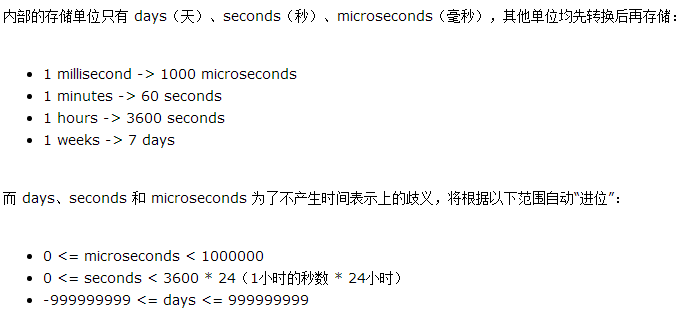

In [57]:
Image(filename="py35_picture\chap-111-1.png")

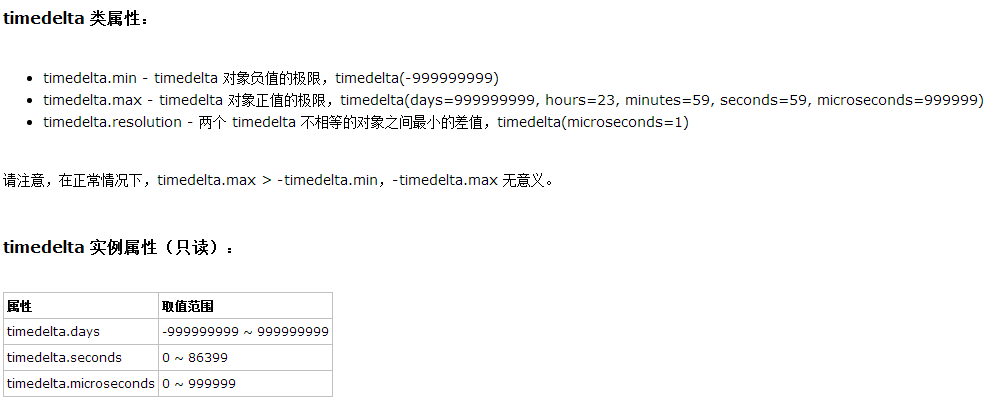

In [58]:
Image(filename="py35_picture\chap-111-2.png")

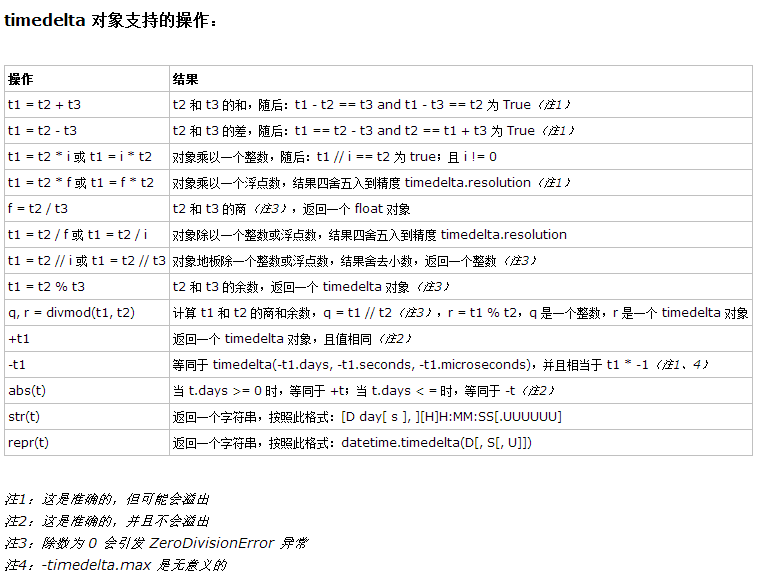

In [59]:
Image(filename="py35_picture\chap-111-3.png")

In [61]:
from datetime import timedelta

year = timedelta(days=365)
another_year = timedelta(weeks=40, days=84, hours=23,
                         minutes=50, seconds=600)  # adds up to 365 days

year.total_seconds()

31536000.0

In [64]:
print(year == another_year)

ten_years = 10 * year
print(ten_years)
print(ten_years, ten_years.days // 365)

nine_years = ten_years - year
print(nine_years)
print(nine_years, nine_years.days // 365)

three_years = nine_years // 3
print(three_years)
print(three_years, three_years.days // 365)

print(abs(three_years - ten_years) == 2 * three_years + year)

True
3650 days, 0:00:00
3650 days, 0:00:00 10
3285 days, 0:00:00
3285 days, 0:00:00 9
1095 days, 0:00:00
1095 days, 0:00:00 3
True


In [60]:
d = dt.datetime(2017,1,10,11,12,25,50000)
td = d - dt.datetime.now() # timedelta 对象，由其他日期-时间相关对象的数学运算得到
print(td)
print(type(td))

print(td.days)
print(td.seconds)
print(td.microseconds)
print(td.total_seconds()) # 返回 timedelta 对象所包含的总秒数，相当于 td / timedelta(seconds=1)
# 请注意，对于非常大的时间间隔（在大多数平台上是大于270年），这种方法将失去微秒（microsecond）精度

-1 day, 22:15:50.141949
<class 'datetime.timedelta'>
-1
80150
141949
-6249.858051


#### 1.1.5 date 对象
- 表示一个日期，在一个理想化的日历里，日期由 year（年）、month（月）、day（日）组成
- 语法：
  > - datetime.date(year, month, day)
  > - 所有的参数都是必需的，参数可以是整数，并且在以下范围内：
  > > - MINYEAR <= year <= MAXYEAR（也就是 1 ~ 9999）
  > > - 1 <= month <= 12
  > > - 1 <= day <= 根据 year 和 month 来决定（例如 2015年2月 只有 28 天）

##### 1.1.5.1  date 实例方法：
- date.replace(year, month, day)
  > 生成一个新的日期对象，用参数指定的年、月、日代替原有对象中的属性
- date.timetuple()
  > 返回日期对应的 time.struct_time 对象（类似于 time 模块的 time.localtime()）
- date.toordinal()
  > 返回日期对应的 Gregorian Calendar 日期
- date.weekday()
  > 返回 0 ~ 6 表示星期几（星期一是 0，依此类推）
- date.isoweekday()
  > 返回 1 ~ 7 表示星期几（星期一是1， 依此类推）
- date.isocalendar()
  > 返回一个三元组格式 (year, month, day)
- date.isoformat()
  > 返回一个 ISO 8601 格式的日期字符串，如 "YYYY-MM-DD" 的字符串
- date.\__str\__()
  > 对于 date 对象 d 来说，str(d) 相当于 d.isoformat()
- date.ctime()
  > 返回一个表示日期的字符串，相当于 time 模块的 time.ctime(time.mktime(d.timetuple()))
- date.strftime(format)
  > 返回自定义格式化字符串表示日期，下面有详解
- date.\__format\__(format)
  > 跟 date.strftime(format) 一样，这使得调用 str.format() 时可以指定 data 对象的字符串

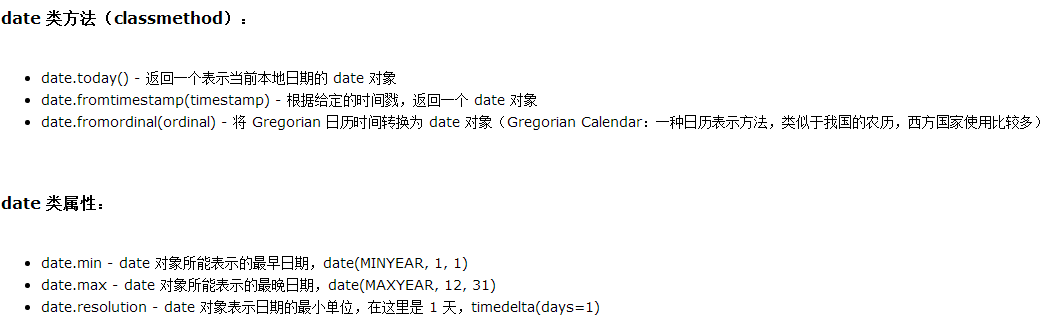

In [66]:
Image(filename="py35_picture\chap-111-4.png")

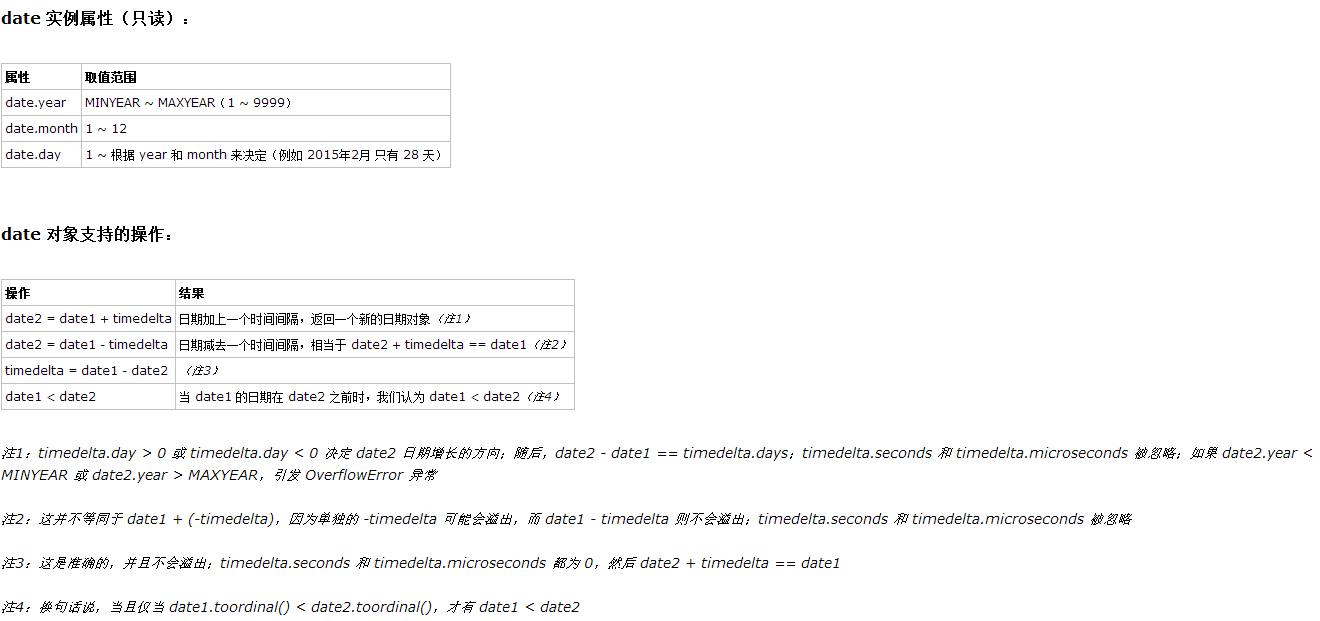

In [65]:
Image(filename="py35_picture\chap-111-5.png")

In [71]:
import time
from datetime import date

today = date.today()
print(today)

print(today == date.fromtimestamp(time.time()))
my_birthday = date(today.year, 6, 24)
print(my_birthday)

if my_birthday < today:
    my_birthday = my_birthday.replace(year = today.year + 1)
print(my_birthday)

time_to_birthday = abs(my_birthday - today)
time_to_birthday.days

2017-01-10
True
2017-06-24
2017-06-24


165

In [79]:
from datetime import date

d = date.fromordinal(735678)  # 自日期 1.1.0001 之后的第 735678 天
print(d);print()

t = d.timetuple()
print(t);print()   
for i in t:
    print(i)
    
print()
ic = d.isocalendar()
print(ic);print()
for i in ic:
    print(i)
    
print()
print(d.isoformat());print()
print(d.strftime("%d/%m/%y"));print()
print(d.strftime("%A %d. %B %Y"));print()
print('The {1} is {0:%d}, the {2} is {0:%B}.'.format(d, "day", "month"))

2015-03-21

time.struct_time(tm_year=2015, tm_mon=3, tm_mday=21, tm_hour=0, tm_min=0, tm_sec=0, tm_wday=5, tm_yday=80, tm_isdst=-1)

2015
3
21
0
0
0
5
80
-1

(2015, 12, 6)

2015
12
6

2015-03-21

21/03/15

Saturday 21. March 2015

The day is 21, the month is March.


#### 1.1.6 time  对象
- 表示一天中的一个时间，并且可以通过 tzinfo 对象进行调整
- 语法：
  > - datetime.time(hour=0, minute=0, second=0, microsecond=0, tzinfo=None)
  > - 所有的参数都是可选的；tzinfo 可以是 None 或者 tzinfo 子类的实例对象；其余的参数可以是整数，并且在以下范围内：
  > > - 0 <= hour < 24
  > > - 0 <= minute < 60
  > > - 0 <= second < 60
  > > - 0 <= microsecond < 1000000
  > - 注：如果参数超出范围，将引发 ValueError 异常

##### 1.1.6.1 time 实例方法：
- time.replace([hour[, minute[, second[, microsecond[, tzinfo]]]]]) 
  > 生成一个新的时间对象，用参数指定时间代替原有对象中的属性
- time.isoformat()
  > 返回一个 ISO 8601 格式的日期字符串，如 "HH:MM:SS.mmmmmm" 的字符串
- time.\__str\__()
  > 对于 time 对象 t 来说，str(t) 相当于 t.isoformat()
- time.strftime(format)
  > 返回自定义格式化字符串表示时间，下面有详解
- time.\__format\__(format)
  > 跟 time.strftime(format) 一样，这使得调用 str.format() 时可以指定 time 对象的字符串
- time.utcoffset()
  > 如果 tzinfo 属性是 None，则返回 None；否则返回 self.tzinfo.utcoffset(self)
- time.dst()
  > 如果 tzinfo 属性是 None，则返回 None；否则返回 self.tzinfo.dst(self)
- time.tzname()
  > 如果 tzinfo 属性是 None，则返回 None；否则返回 self.tzinfo.tzname(self)

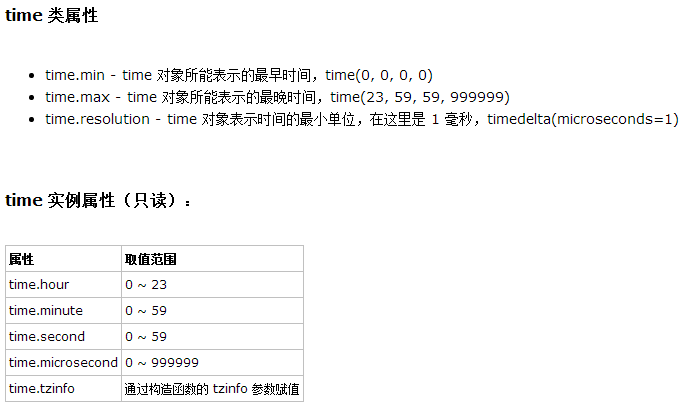

In [80]:
Image(filename="py35_picture\chap-111-6.png")

In [84]:
from datetime import time, timedelta, tzinfo

class GMT1(tzinfo):
    def utcoffset(self, dt):
            return timedelta(hours=1)
    def dst(self, dt):
            return timedelta(0)
    def tzname(self, dt):
            return "欧洲/布拉格"

t = time(14, 10, 30, tzinfo=GMT1())
print(t);print()

gmt = GMT1()
print(gmt);print()
print(t.isoformat());print()
print(t.dst());print()
print(t.tzname());print()

# print(t.strftime("%H:%M:%S %Z"));print()
print('The {} is {:%H:%M}.'.format("time", t))

14:10:30+01:00


14:10:30+01:00

0:00:00

欧洲/布拉格

The time is 14:10.


#### 1.1.7 格式化字符串：strftime() 和 strptime()
- date, datetime, 和 time 对象均支持使用 strftime(format) 方法，将指定的日期或时间转换为自定义的格式化字符串
- 相反的，datetime.strptime() 类方法却是把格式化字符串转换为 datetime 对象

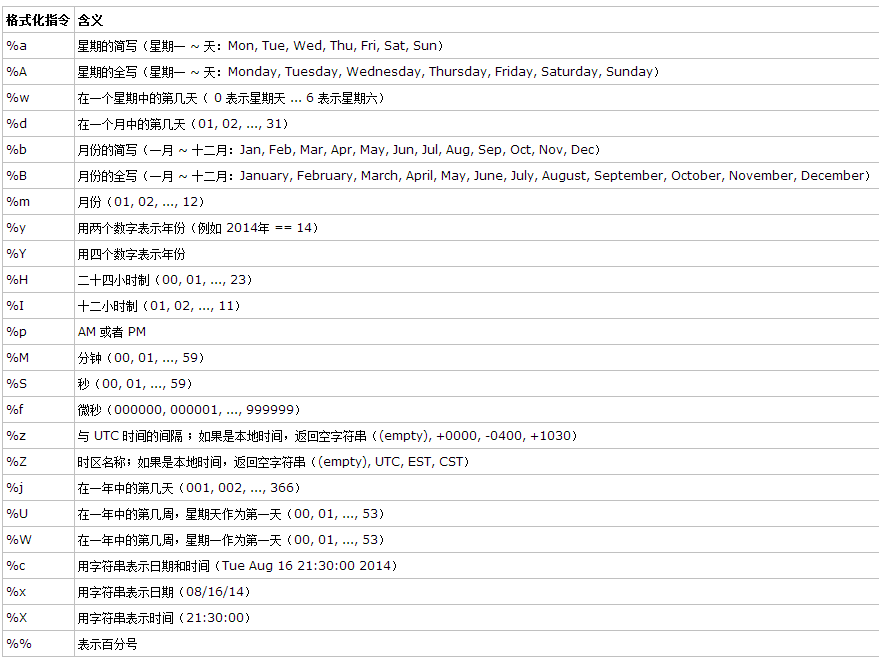

In [105]:
Image(filename="py35_picture\chap-111-9.png")

In [106]:
from datetime import datetime

dt = datetime.now()

print('(%Y-%m-%d %H:%M:%S %f): ', dt.strftime('%Y-%m-%d %H:%M:%S %f'))
print('(%Y-%m-%d %H:%M:%S %p): ', dt.strftime('%y-%m-%d %I:%M:%S %p'))

(%Y-%m-%d %H:%M:%S %f):  2017-01-10 13:48:24 096703
(%Y-%m-%d %H:%M:%S %p):  17-01-10 01:48:24 PM


In [107]:
print('%%a: %s ' % dt.strftime('%a'))
print('%%A: %s ' % dt.strftime('%A'))
print('%%b: %s ' % dt.strftime('%b'))
print('%%B: %s ' % dt.strftime('%B'))

%a: Tue 
%A: Tuesday 
%b: Jan 
%B: January 


In [108]:
print('日期时间%%c: %s ' % dt.strftime('%c'))
print('日期%%x：%s ' % dt.strftime('%x'))
print('时间%%X：%s ' % dt.strftime('%X'))

日期时间%c: Tue Jan 10 13:48:24 2017 
日期%x：01/10/17 
时间%X：13:48:24 


In [109]:
print('今天是这周的第%s天 ' % dt.strftime('%w'))
print('今天是今年的第%s天 ' % dt.strftime('%j'))
print('今周是今年的第%s周 ' % dt.strftime('%U'))

今天是这周的第2天 
今天是今年的第010天 
今周是今年的第02周 


### 1.2 pytz 模块
- 实现全世界最重要的时区

In [125]:
import pytz

In [145]:
# dir(pytz.country_names)

In [150]:
print(pytz.country_names['US'])
print(pytz.country_timezones['BE'])
print()
pytz.common_timezones[-10:]

United States
['Europe/Brussels']



['Pacific/Wake',
 'Pacific/Wallis',
 'US/Alaska',
 'US/Arizona',
 'US/Central',
 'US/Eastern',
 'US/Hawaii',
 'US/Mountain',
 'US/Pacific',
 'UTC']

In [151]:
u.astimezone(pytz.timezone('CET'))

datetime.datetime(2017, 1, 10, 7, 53, 39, 931138, tzinfo=<DstTzInfo 'CET' CET+1:00:00 STD>)

In [152]:
u.astimezone(pytz.timezone('GMT'))

datetime.datetime(2017, 1, 10, 6, 53, 39, 931138, tzinfo=<StaticTzInfo 'GMT'>)

In [153]:
u.astimezone(pytz.timezone('US/Central'))

datetime.datetime(2017, 1, 10, 0, 53, 39, 931138, tzinfo=<DstTzInfo 'US/Central' CST-1 day, 18:00:00 STD>)

## 2 Numpy
- datetime64 类

In [ ]:
import numpy as np

In [155]:
nd = np.datetime64('2015-10-31')
nd

numpy.datetime64('2015-10-31')

In [157]:
np.datetime_as_string(nd) # 表示为字符串对象

'2015-10-31'

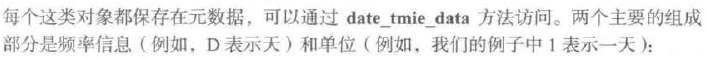

In [158]:
Image(filename="py35_picture\chap-datetime64.png")

In [159]:
np.datetime_data(nd)

('D', 1)

In [167]:
# datetime 对象 与 datetime64对象 互相转换
d = dt.datetime(2017,1,10,11,12,25,50000) 
print(type(d))
nd = np.datetime64(d)
print(type(nd))
print(type(nd.astype(dt.datetime)))

<class 'datetime.datetime'>
<class 'numpy.datetime64'>
<class 'datetime.datetime'>


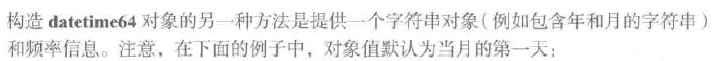

In [168]:
Image(filename="py35_picture\chap-datetime64-2.png")

In [171]:
nd = np.datetime64('2015-10','D')
print(nd)

np.datetime64('2015-10','D') == np.datetime64('2015-10-01')

2015-10-01


True

In [172]:
np.array(['2016-06-10','2017-07-10','2017-08-10'],dtype = 'datetime64')

array(['2016-06-10', '2017-07-10', '2017-08-10'], dtype='datetime64[D]')

In [173]:
np.array(['2016-06-10T12:00:00','2017-07-10T12:00:00','2017-08-10T12:00:00'],dtype = 'datetime64[s]')

array(['2016-06-10T12:00:00', '2017-07-10T12:00:00', '2017-08-10T12:00:00'], dtype='datetime64[s]')

In [174]:
# 日期范围
np.arange('2016-01-01','2016-01-04',dtype = 'datetime64') # day

array(['2016-01-01', '2016-01-02', '2016-01-03'], dtype='datetime64[D]')

In [175]:
np.arange('2016-01','2016-04',dtype = 'datetime64') # month

array(['2016-01', '2016-02', '2016-03'], dtype='datetime64[M]')

In [177]:
np.arange('2016-01-01','2016-10-01',dtype = 'datetime64[W]')[:10]

array(['2015-12-31', '2016-01-07', '2016-01-14', '2016-01-21',
       '2016-01-28', '2016-02-04', '2016-02-11', '2016-02-18',
       '2016-02-25', '2016-03-03'], dtype='datetime64[W]')

In [180]:
dt1 = np.arange('2016-06-10T12:00:00','2016-06-11T12:00:00',dtype = 'datetime64[h]') # hour
dt1[:10]

array(['2016-06-10T12', '2016-06-10T13', '2016-06-10T14', '2016-06-10T15',
       '2016-06-10T16', '2016-06-10T17', '2016-06-10T18', '2016-06-10T19',
       '2016-06-10T20', '2016-06-10T21'], dtype='datetime64[h]')

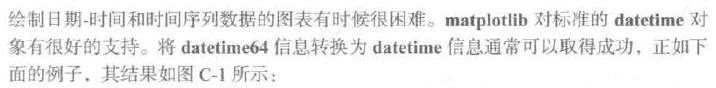

In [179]:
Image(filename="py35_picture\chap-datetime64-3.png")

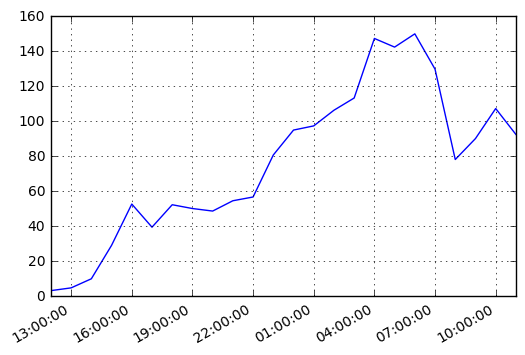

In [182]:
np.random.seed(0)
rnd = np.random.standard_normal(len(dt1)).cumsum() ** 2

fig = plt.figure()
plt.plot(dt1.astype(dt.datetime),rnd)
plt.grid(True)
fig.autofmt_xdate()

## 3 pandas
- DatetimeIndex 类

In [184]:
ts = pd.Timestamp('2016-06-30')
ts

Timestamp('2016-06-30 00:00:00')

In [195]:
# datetime 对象 与 Timestamp 对象 互相转换
d = ts.to_datetime()
print(type(d))
print(type(pd.Timestamp(d)))

print(type(nd))
print(type(pd.Timestamp(nd)))

<class 'datetime.datetime'>
<class 'pandas.tslib.Timestamp'>
<class 'numpy.datetime64'>
<class 'pandas.tslib.Timestamp'>


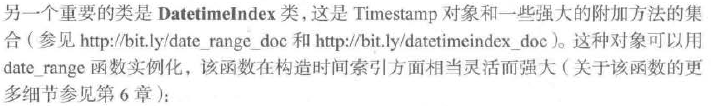

In [196]:
Image(filename="py35_picture\chap-DatetimeIndex.png")

In [198]:
dti = pd.date_range('2016/01/01',freq = 'M', periods = 12)
print(dti[6])
dti 

2016-07-31 00:00:00


DatetimeIndex(['2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31'],
              dtype='datetime64[ns]', freq='M')

In [201]:
pdi = dti.to_pydatetime()
print(type(dti))
print(type(pdi))
pdi

<class 'pandas.tseries.index.DatetimeIndex'>
<class 'numpy.ndarray'>


array([datetime.datetime(2016, 1, 31, 0, 0),
       datetime.datetime(2016, 2, 29, 0, 0),
       datetime.datetime(2016, 3, 31, 0, 0),
       datetime.datetime(2016, 4, 30, 0, 0),
       datetime.datetime(2016, 5, 31, 0, 0),
       datetime.datetime(2016, 6, 30, 0, 0),
       datetime.datetime(2016, 7, 31, 0, 0),
       datetime.datetime(2016, 8, 31, 0, 0),
       datetime.datetime(2016, 9, 30, 0, 0),
       datetime.datetime(2016, 10, 31, 0, 0),
       datetime.datetime(2016, 11, 30, 0, 0),
       datetime.datetime(2016, 12, 31, 0, 0)], dtype=object)

In [202]:
pd.DatetimeIndex(pdi) # 反向操作

DatetimeIndex(['2016-01-31', '2016-02-29', '2016-03-31', '2016-04-30',
               '2016-05-31', '2016-06-30', '2016-07-31', '2016-08-31',
               '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-31'],
              dtype='datetime64[ns]', freq=None)

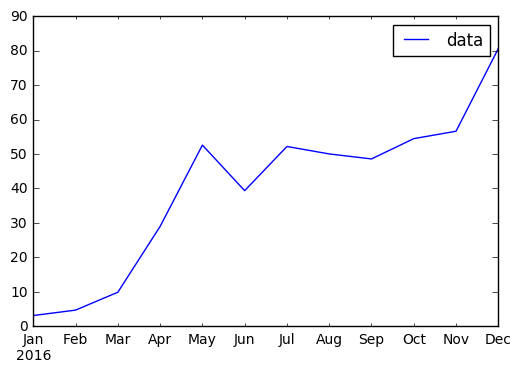

In [204]:
np.random.seed(0) # 绘制日期-时间信息对应的图表
rnd = np.random.standard_normal(len(dti)).cumsum() ** 2

df = pd.DataFrame(rnd,columns = ['data'], index = dti)
df.plot()

In [205]:
# pandas与pytz集成，管理时区
pd.date_range('2016/01/01',freq = 'M',periods=12,tz = pytz.timezone('CET'))

DatetimeIndex(['2016-01-31 00:00:00+01:00', '2016-02-29 00:00:00+01:00',
               '2016-03-31 00:00:00+02:00', '2016-04-30 00:00:00+02:00',
               '2016-05-31 00:00:00+02:00', '2016-06-30 00:00:00+02:00',
               '2016-07-31 00:00:00+02:00', '2016-08-31 00:00:00+02:00',
               '2016-09-30 00:00:00+02:00', '2016-10-31 00:00:00+01:00',
               '2016-11-30 00:00:00+01:00', '2016-12-31 00:00:00+01:00'],
              dtype='datetime64[ns, CET]', freq='M')

In [207]:
dti = pd.date_range('2016/01/01',freq = 'M',periods=12,tz = 'US/Eastern')
dti

DatetimeIndex(['2016-01-31 00:00:00-05:00', '2016-02-29 00:00:00-05:00',
               '2016-03-31 00:00:00-04:00', '2016-04-30 00:00:00-04:00',
               '2016-05-31 00:00:00-04:00', '2016-06-30 00:00:00-04:00',
               '2016-07-31 00:00:00-04:00', '2016-08-31 00:00:00-04:00',
               '2016-09-30 00:00:00-04:00', '2016-10-31 00:00:00-04:00',
               '2016-11-30 00:00:00-05:00', '2016-12-31 00:00:00-05:00'],
              dtype='datetime64[ns, US/Eastern]', freq='M')

In [208]:
dti.tz_convert("GMT") # 转换时区

DatetimeIndex(['2016-01-31 05:00:00+00:00', '2016-02-29 05:00:00+00:00',
               '2016-03-31 04:00:00+00:00', '2016-04-30 04:00:00+00:00',
               '2016-05-31 04:00:00+00:00', '2016-06-30 04:00:00+00:00',
               '2016-07-31 04:00:00+00:00', '2016-08-31 04:00:00+00:00',
               '2016-09-30 04:00:00+00:00', '2016-10-31 04:00:00+00:00',
               '2016-11-30 05:00:00+00:00', '2016-12-31 05:00:00+00:00'],
              dtype='datetime64[ns, GMT]', freq='M')